Read the File Into A Data Frame

In [125]:
import pandas as pd

# load the data set into a dataframe
df = pd.read_csv("./diabetes.csv")

# Display the first few rows of the dataset 
print("First few rows of the diabetes dataset:")
print(df.head())

# print the shape
print("\n")
print(df.shape)

# check column names
print("\nColumn Names:")
print(df.columns)


First few rows of the diabetes dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(768, 9)

Column Names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


No need to omit any features from this as all the data is numerical and relatively unique

In [126]:
#count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)
#Calculate percentage of null value
missing_percentage=missing_number/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info


,missing number,missing percentage
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [127]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Show the the densities of each feature

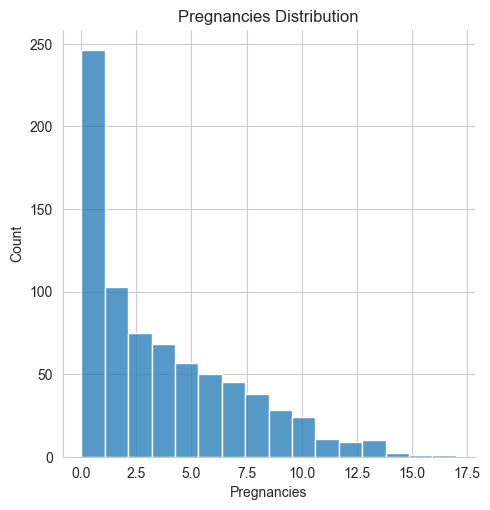

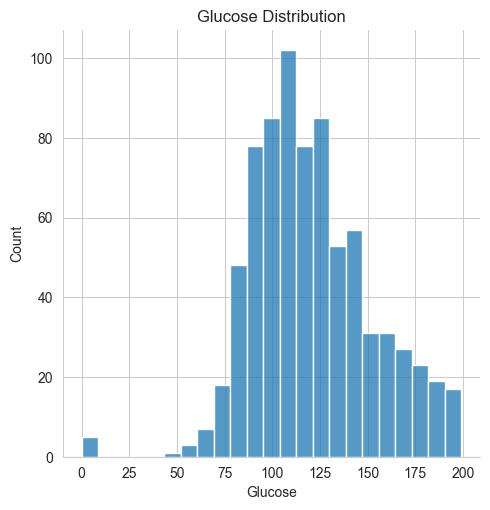

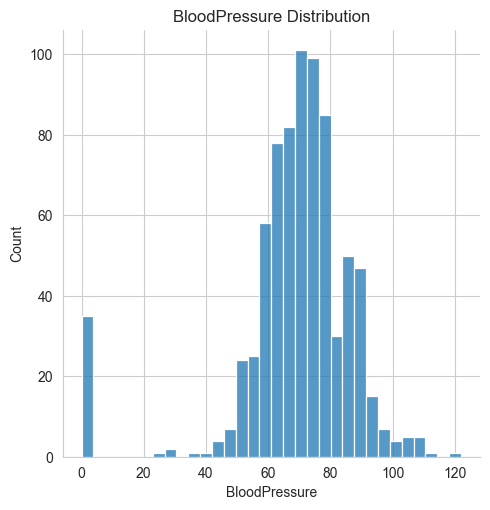

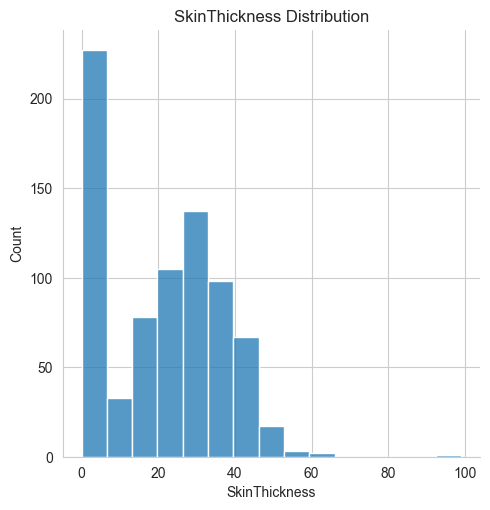

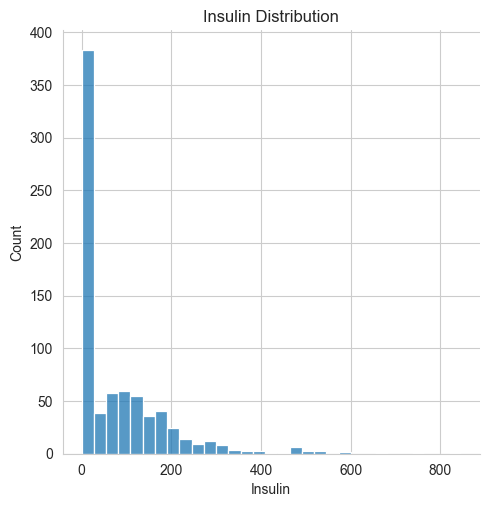

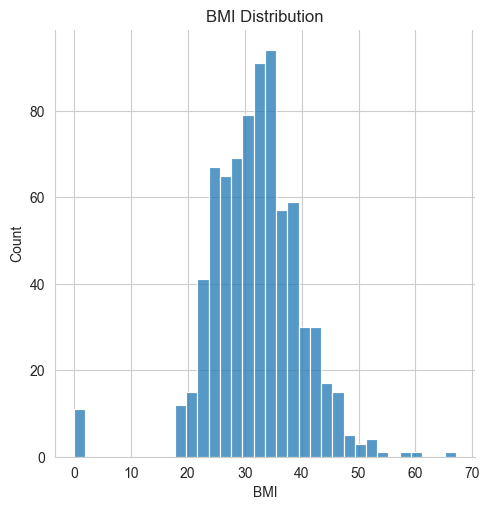

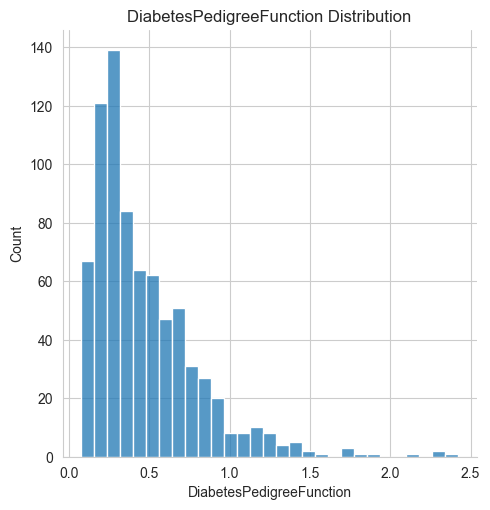

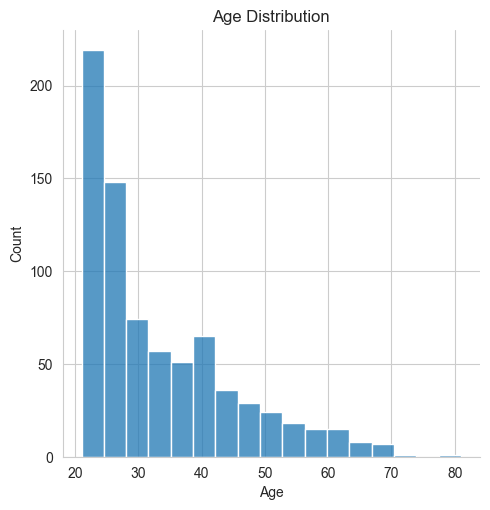

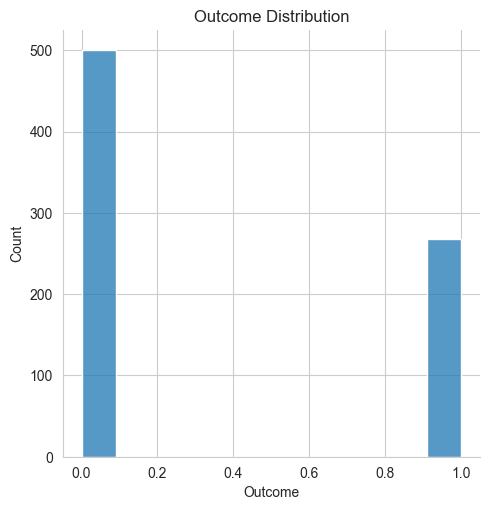

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.columns:
    sns.displot(df[str(col)])
    plt.title(f"{str(col)} Distribution")
    plt.show()

Show the box plots for each feature and the outcome 

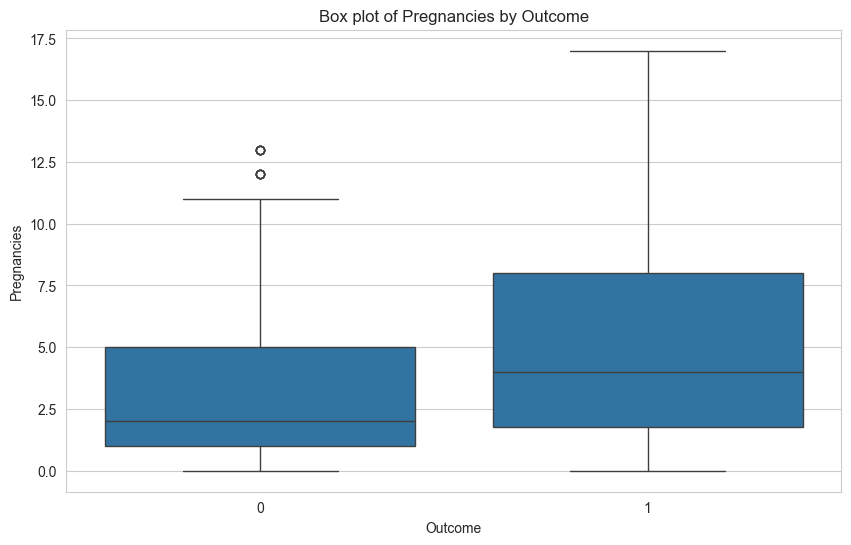

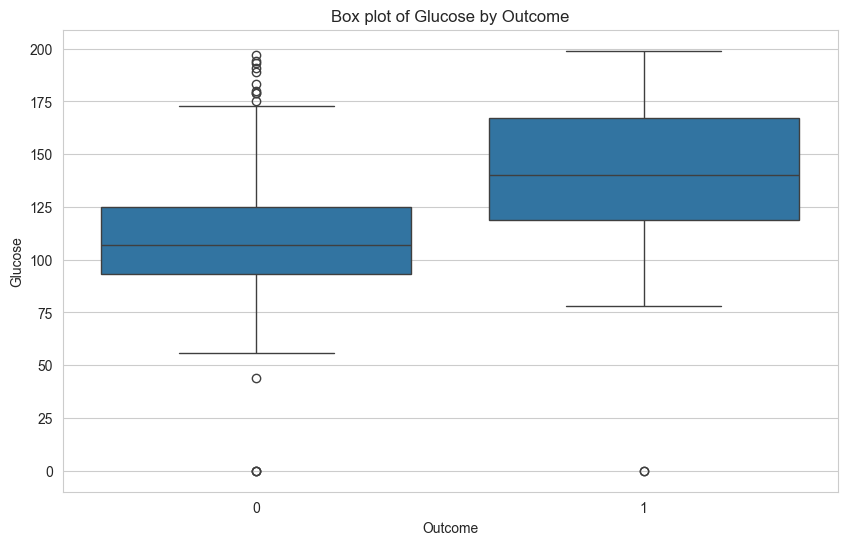

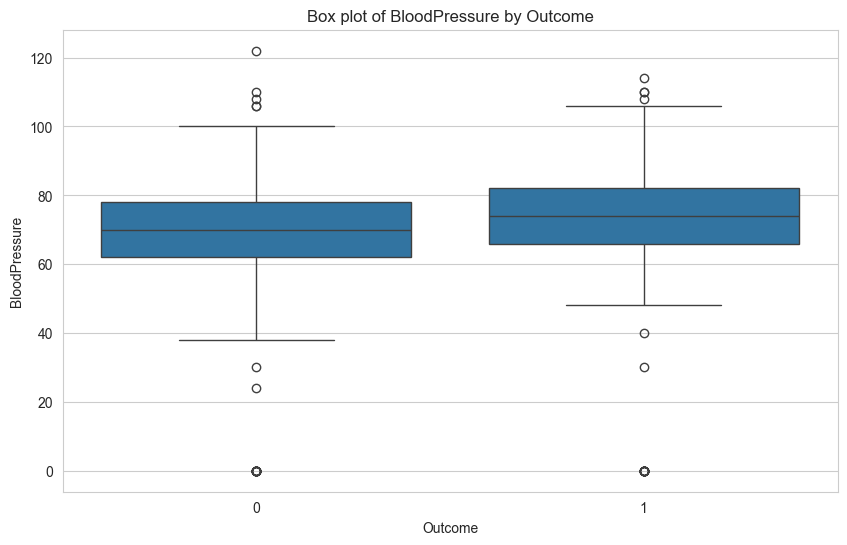

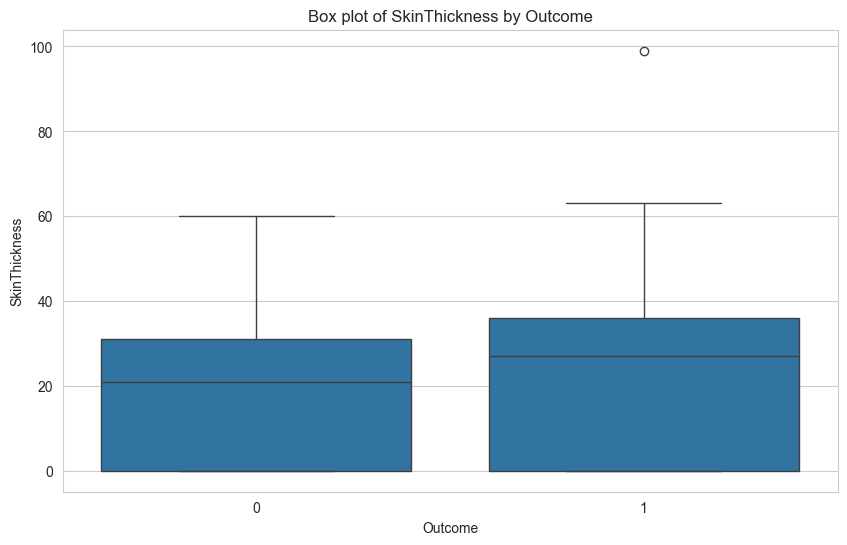

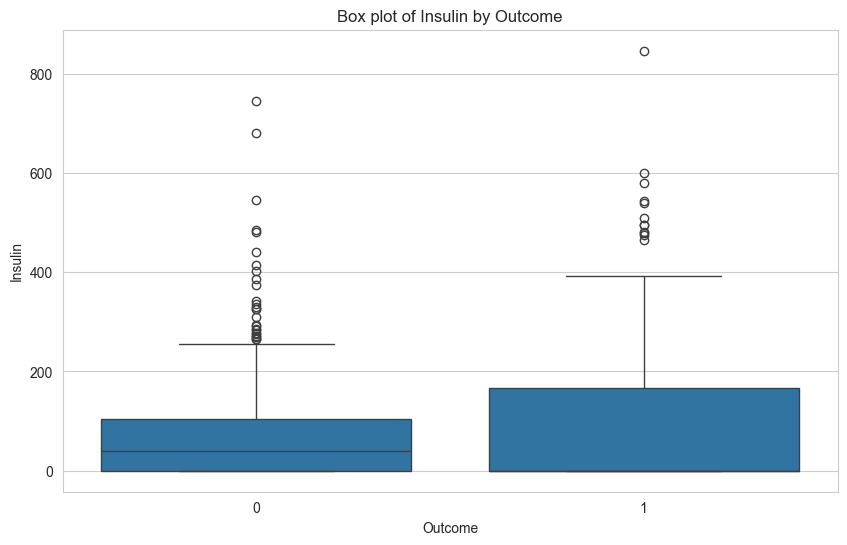

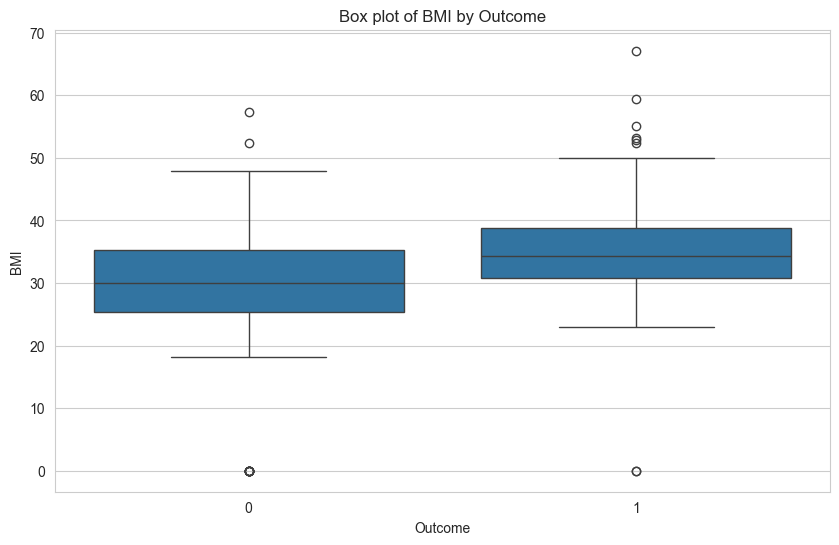

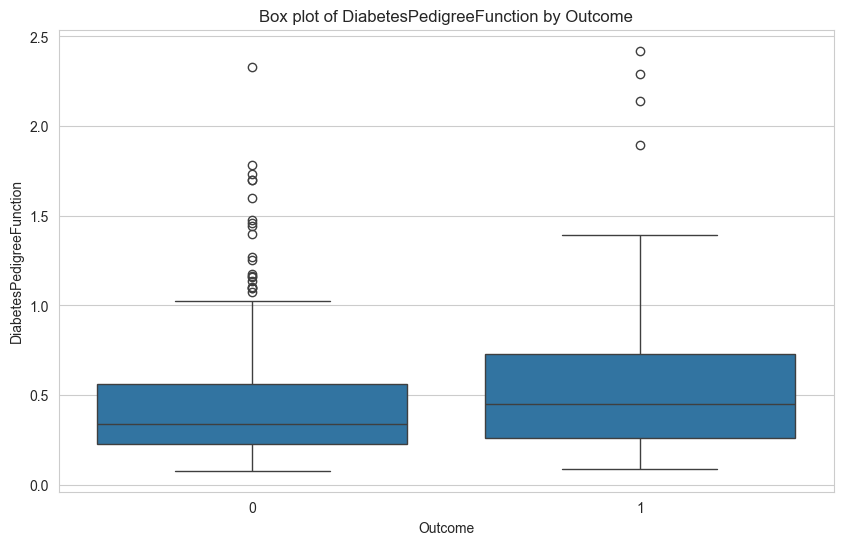

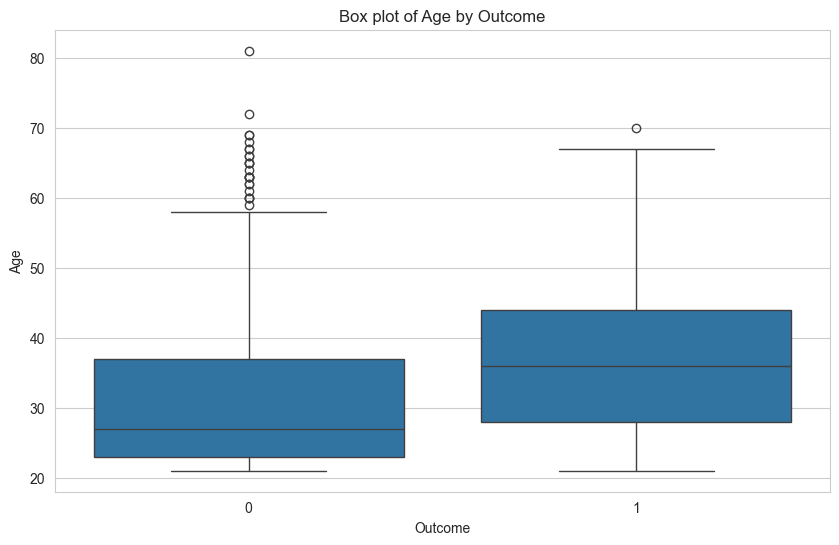

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing both numerical and categorical fields

# Get the list of column names excluding 'Outcome'
columns_to_plot = [col for col in df.columns if col != 'Outcome']

# Iterate over each column
for col in columns_to_plot:
    # current column
    #print("this is the current col\n")
    #print(col)
    #print(df[col].head)
    
    # Create a box plot for numerical fields
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Box plot of {col} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.show()

plot the scatter matrix

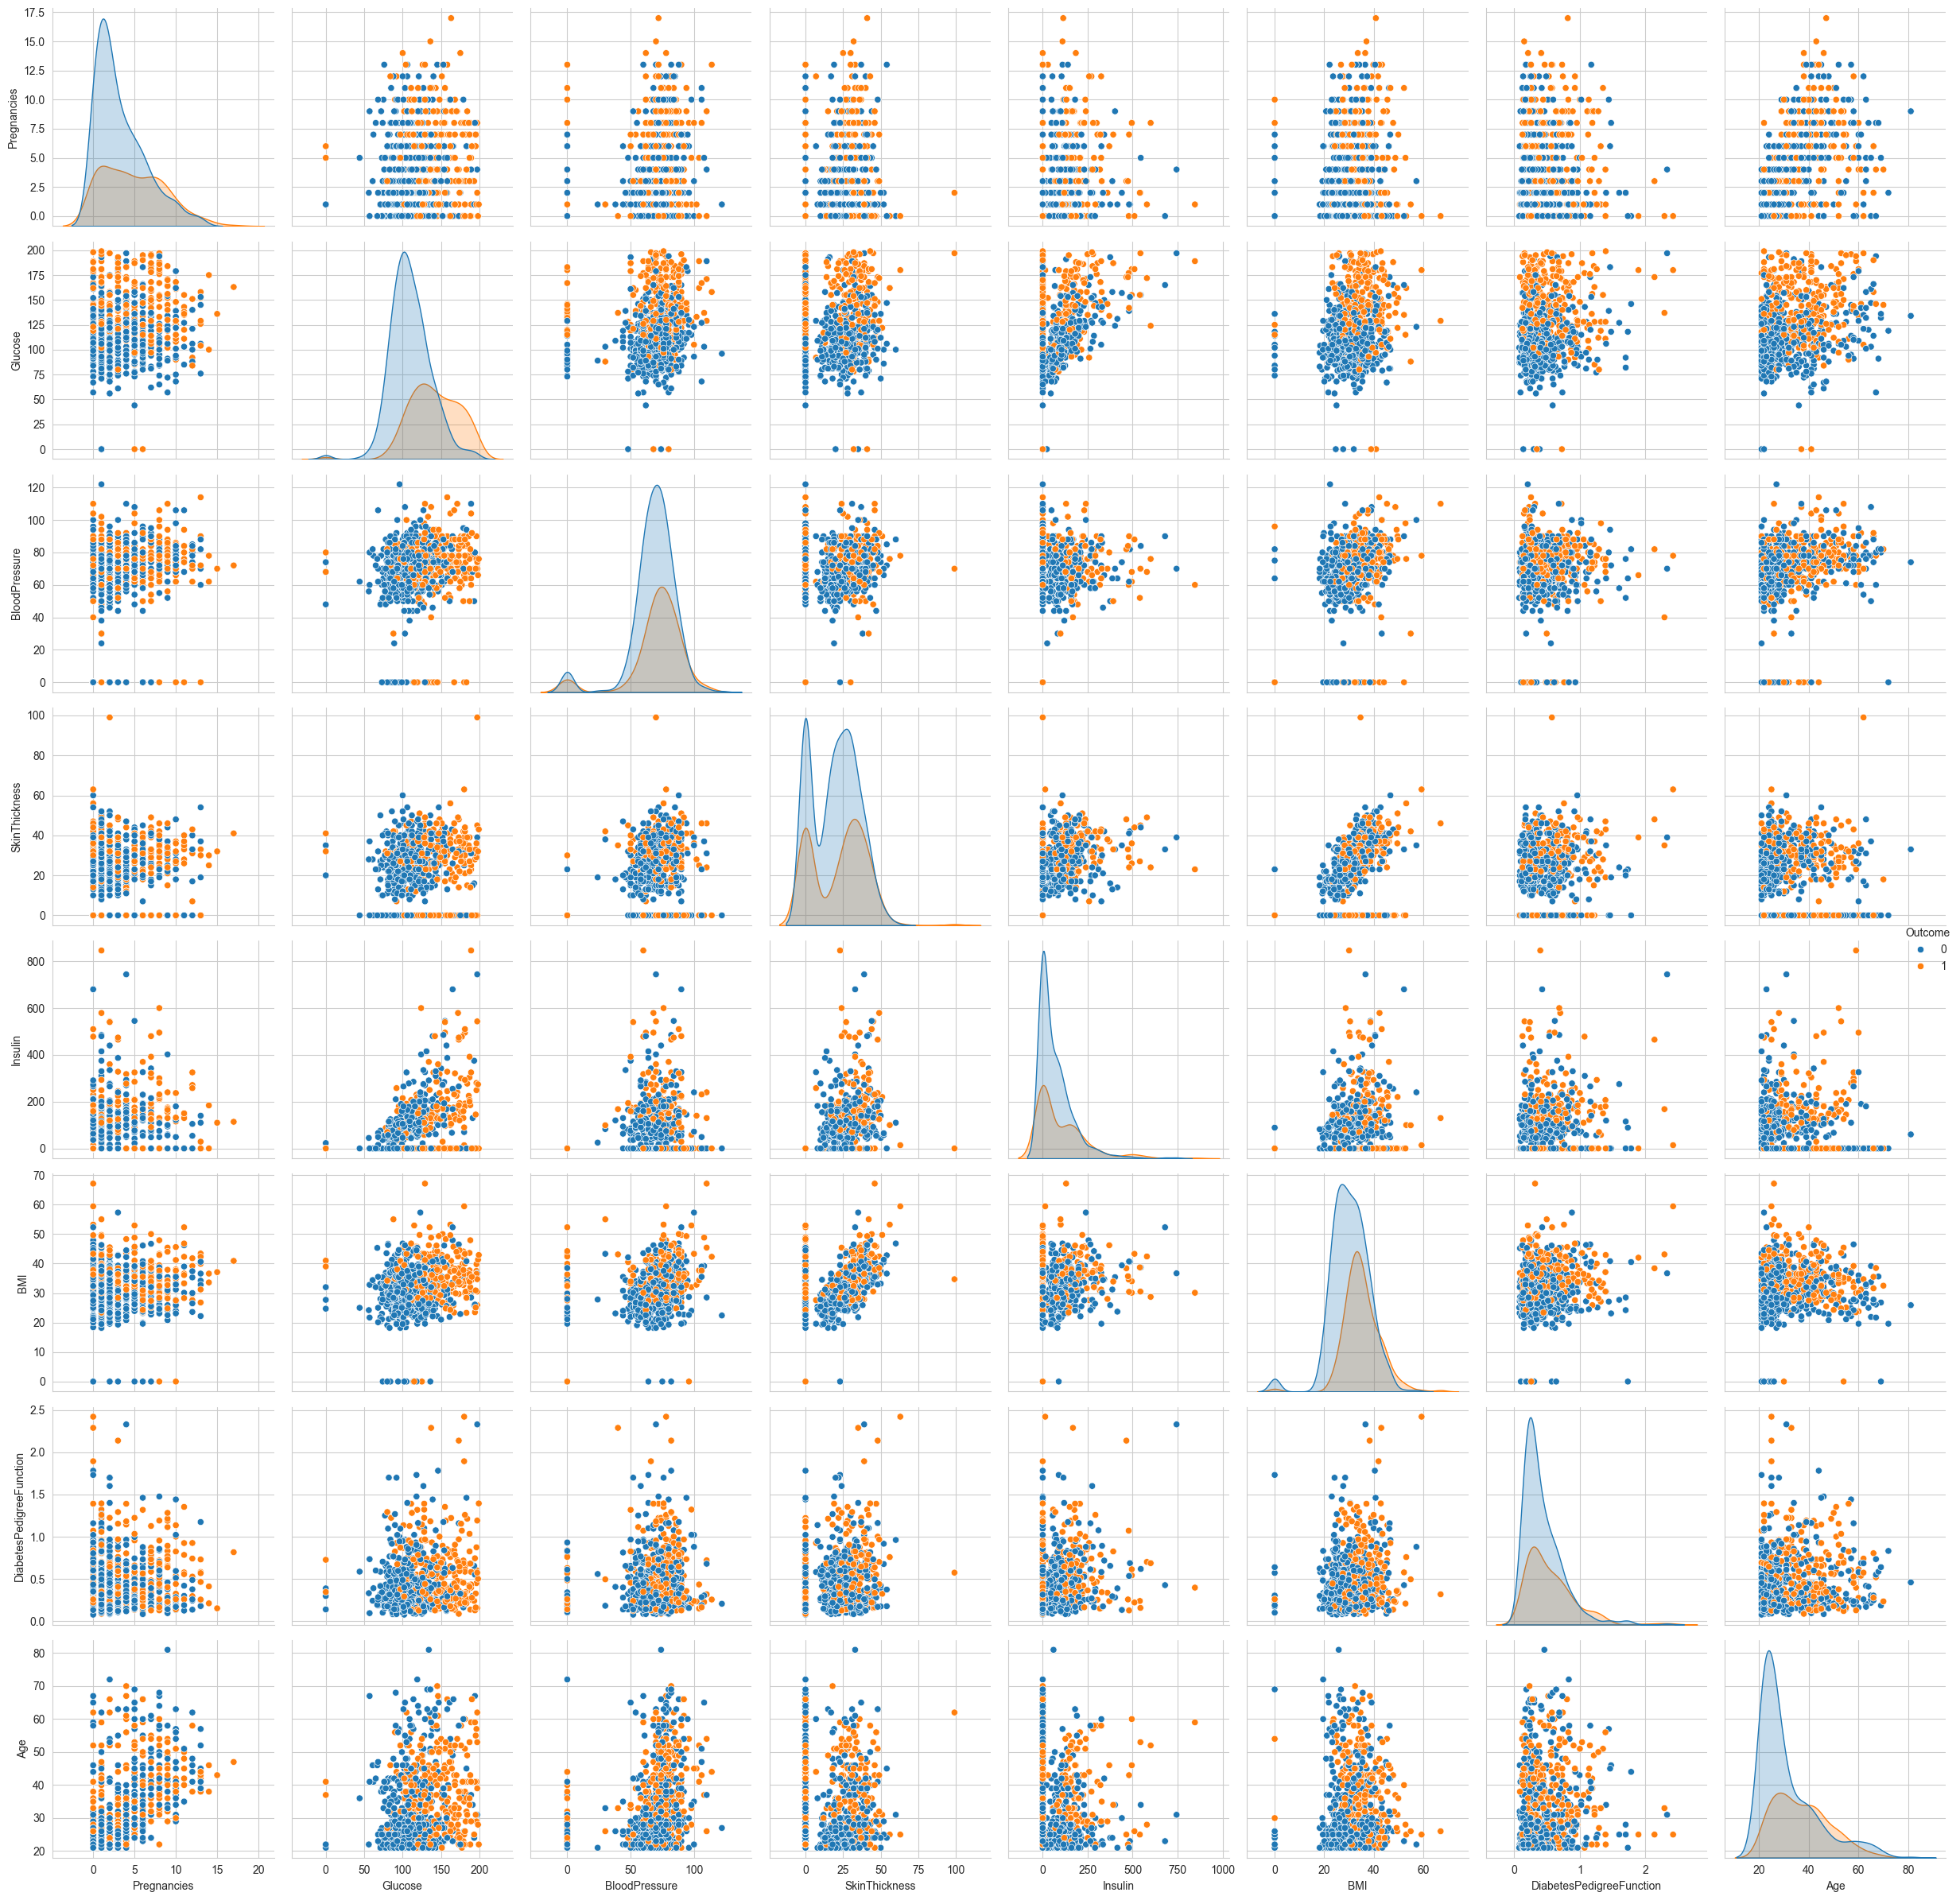

In [132]:

plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="Outcome", height=3)
plt.tight_layout()
plt.show()

# orange = diabetes, blue = no diabetes

Lets take a look at the variance of the Data Set

In [133]:
df.var().sort_values(ascending = True)

DiabetesPedigreeFunction        0.109779
Outcome                         0.227483
Pregnancies                    11.354056
BMI                            62.159984
Age                           138.303046
SkinThickness                 254.473245
BloodPressure                 374.647271
Glucose                      1022.248314
Insulin                     13281.180078
dtype: float64

Lets now take a look at the correlation between each feature

In [143]:
df.corr()["Outcome"].sort_values()

SkinThickness               0.067066
Insulin                     0.090678
DiabetesPedigreeFunction    0.159691
BloodPressure               0.162083
Pregnancies                 0.204362
Age                         0.264841
BMI                         0.301237
Glucose                     0.492908
Outcome                     1.000000
Name: Outcome, dtype: float64

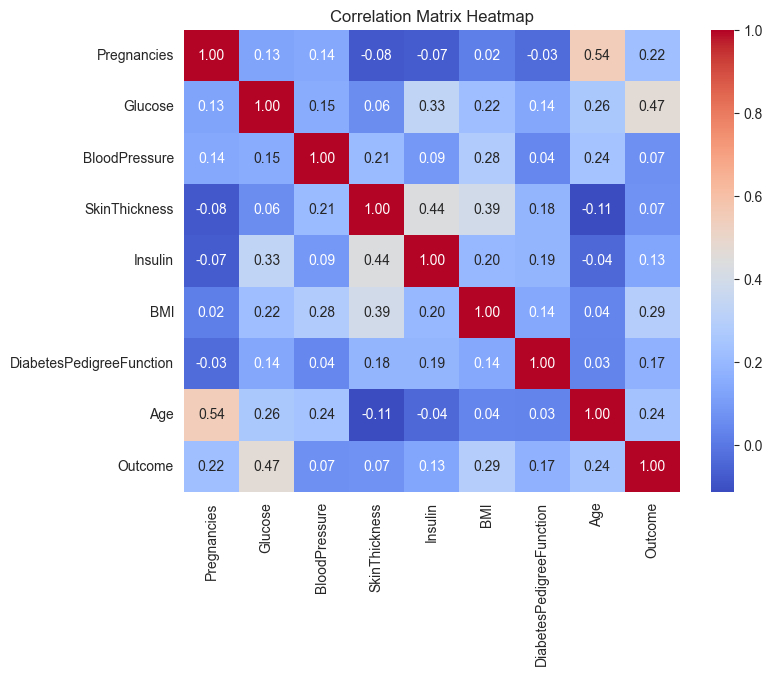

In [134]:
#corrmat = df.drop(columns=["Outcome"]).corr()
corrmat = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Lets Fix the outliers so they are switched to the mean (not working)

In [ ]:
for col in df.columns[:-1]:  # excluding the Description column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[col] < lower_bound
    outliers_upper = df[col] > upper_bound
    
    #if outliers_upper.any():
    #    print(f"{col}'s upper outliers:\n{df.loc[outliers_upper, col]}")
    #if outliers_lower.any():
    #    print(f"{col}'s lower outliers:\n{df.loc[outliers_lower, col]}")
    
    df = df.loc[outliers_lower, col] = df[col].mean()
    df = df.loc[outliers_upper, col] = df[col].mean()


Overall solid and clean dataset. Clear categories without any empty columns, and purely numerical data which is simpler to work with. Solid amount of datapoints (768).